In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/iot_dataset.csv')
df.head(5)

,Source.Name,timestamps,ax,ay,az,mag,Prediction
0,sub11_Abnorm_1.csv,65558,0.98,0.02,-0.05,9.85,Dementia
1,sub11_Abnorm_1.csv,65580,0.98,-0.04,-0.10,9.83,Dementia
2,sub11_Abnorm_1.csv,65602,0.86,-0.26,-0.11,9.05,Dementia
3,sub11_Abnorm_1.csv,65624,0.86,-0.25,-0.14,9.04,Dementia
4,sub11_Abnorm_1.csv,65646,0.94,0.05,-0.09,9.50,Dementia


In [3]:
df['timestamps']

0        65558
1        65580
2        65602
3        65624
4        65646
         ...  
3231    513390
3232    513412
3233    513434
3234    513456
3235    513478
Name: timestamps, Length: 3236, dtype: int64

Separating Dementia and non dementia patients

In [4]:
a_values = []
b_values = []
prediction_a = []
prediction_b = []

for value in df.index:
  if df['Prediction'][value] == 'Dementia':
    prediction_a.append(df['mag'][value])
    a_values.append(df['timestamps'][value])
  else:
    prediction_b.append(df['mag'][value])
    b_values.append(df['timestamps'][value])


Plotting graph

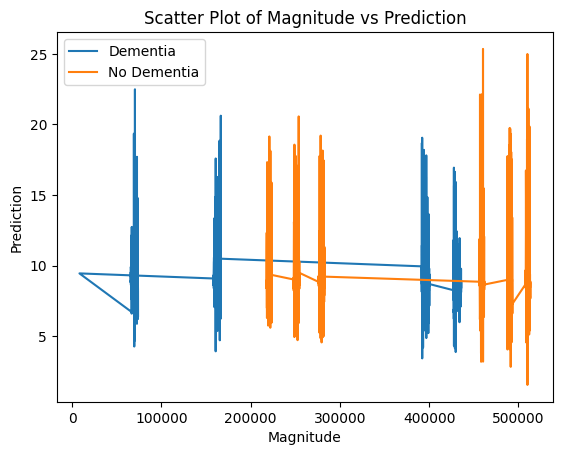

In [5]:
plt.plot(a_values, prediction_a, label='Dementia')
plt.plot(b_values, prediction_b, label='No Dementia')
plt.xlabel('Magnitude')
plt.ylabel('Prediction')
plt.title('Scatter Plot of Magnitude vs Prediction')
plt.legend()
plt.show()

Finding Minimum and maximum values

In [6]:
max_value = max(prediction_a)
min_value = min(prediction_a)
print(f"The minimum magnitude of dementia is: ",{min_value})
print(f"The maximum magnitude of dementia is: ",{max_value})

The minimum magnitude of dementia is:  {3.43}
The maximum magnitude of dementia is:  {22.49}


In [7]:
ds = df.loc[(df['Prediction'] == 'Dementia')]
ds.head()

,Source.Name,timestamps,ax,ay,az,mag,Prediction
0,sub11_Abnorm_1.csv,65558,0.98,0.02,-0.05,9.85,Dementia
1,sub11_Abnorm_1.csv,65580,0.98,-0.04,-0.10,9.83,Dementia
2,sub11_Abnorm_1.csv,65602,0.86,-0.26,-0.11,9.05,Dementia
3,sub11_Abnorm_1.csv,65624,0.86,-0.25,-0.14,9.04,Dementia
4,sub11_Abnorm_1.csv,65646,0.94,0.05,-0.09,9.50,Dementia


In [8]:
maximum_value = ds.loc[(ds['mag'] == max_value)]
maximum_value

,Source.Name,timestamps,ax,ay,az,mag,Prediction
218,sub11_Abnorm_1.csv,70354,1.79,0.33,-1.32,22.49,Dementia


In [9]:
minimum_value = ds.loc[(ds['mag'] == min_value)]
minimum_value

,Source.Name,timestamps,ax,ay,az,mag,Prediction
1689,sub12_Abnorm_1.csv,392302,0.29,-0.16,0.1,3.43,Dementia


Reading data of patients

In [11]:
ddf = pd.read_csv('/content/dementia_patient.csv')
ndf = pd.read_csv('/content/non_demetia_patient.csv')

Plotting graph for dementia patient walking pattern

In [12]:
ddf.head(5)

,timestamps,ax,ay,az,mag
0,65558,0.98,0.02,-0.05,9.85
1,65580,0.98,-0.04,-0.10,9.83
2,65602,0.86,-0.26,-0.11,9.05
3,65624,0.86,-0.25,-0.14,9.04
4,65646,0.94,0.05,-0.09,9.50


Plotting graph comparison for dementia and non dementia patient walking pattern

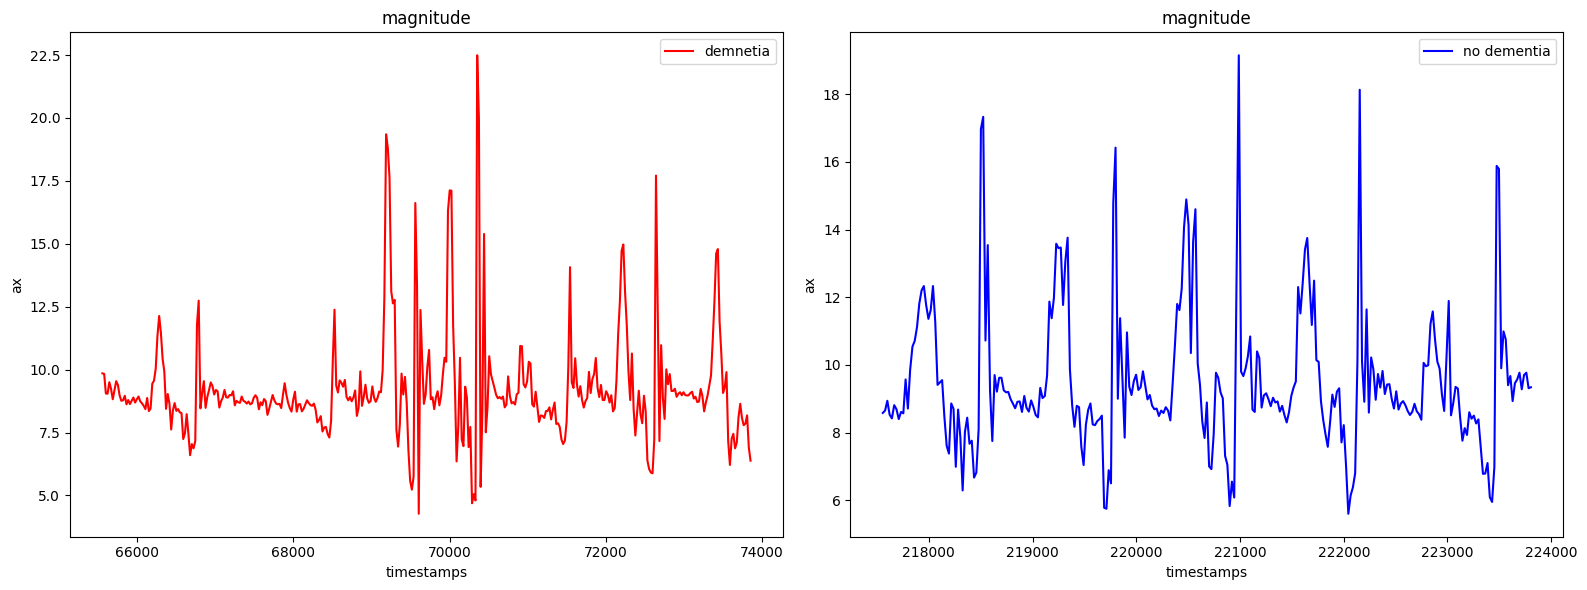

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(ddf['timestamps'], ddf['mag'], color='red', label='demnetia')
axes[0].set_title('magnitude')
axes[0].set_xlabel('timestamps')
axes[0].set_ylabel('ax')
axes[0].legend()

axes[1].plot(ndf['timestamps'], ndf['mag'], color='blue', label='no dementia')
axes[1].set_title('magnitude')
axes[1].set_xlabel('timestamps')
axes[1].set_ylabel('ax')
axes[1].legend()

plt.tight_layout()
plt.show()